## Discovery and Learning with Big Data/Machine Learning
### DeAundrie Howard
### Unspervised Machine Learning: KMeans

### Description Iris Dataset

Data Set: Iris.csv
Title: Iris Plants Database
Updated Sept 21 by C. Blake -Added discrepancy information 
Sources:
- Creator: RA_ Fisher 
- Donor: Michael Marshall 
- Date: 1988 

Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

Predicted attribute: class of iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric, predictive attributes and the class Attribute Information:
- 1.sepal length in cm 
- 2.sepal width in cm 
- 3.petal length in cm 
- 4.petal width incm 
- 5.class: 
    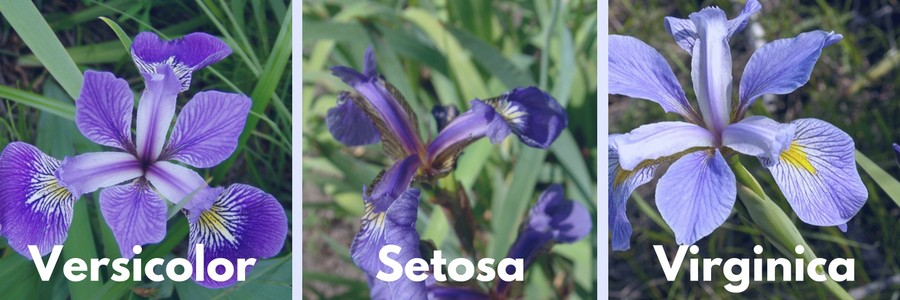


## <span style= 'color: red'>1. What is the Numpy library used for?  Enter your answer by adding a new code block and use markdown.</span>

Numpy library is used for working with arrays and transforming columns and rows.

In [1]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## <span style= 'color: red'>2. What is the Scikit library used for?  Enter your answer by adding a new code block and use markdown.</span>

Scikit library is used to build and deploy machine learning models.

In [4]:
# Import scikit-Learn module for the algorithm/modeL: K-Means
from sklearn.cluster import KMeans

In [5]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Load Data

In [7]:
# Specify location of the dataset
filename = 'iris.csv'
df = pd.read_csv(filename)

### Look at the dataframe

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## <span style= 'color: red'>3. What is code below doing?  Enter your answer by adding a new code block and use markdown.</span>

The code block below is provide the last five (5) records of the dataset/dataFrame.

## <span style= 'color: red'>4. What is the code index_col = 'Id' doing (If you run the code and compare with the output above, you should see the difference)?  Enter your answer by adding a new code block and use markdown.</span>

The code index_col='Id' removes the initial index column given by Pandas and assigns it to the defined column by the user. 

In [10]:
df = pd.read_csv('Iris.csv', index_col='Id')
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df = pd.read_csv('Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Preprocess the Dataset

#### Clean the data:  Find and Mark Missing Values


In [12]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [13]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.notnull().sum())

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64


## Performing the Exploratory Data Analysis (EDA)

## <span style= 'color: red'>5. Change the text of the print function to an alternative text of your choice. Enter your answer by adding a new code block and use markdown.</span>

In [14]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print("Shape of the dataset(rows, columns):",df.shape)

Shape of the dataset(rows, columns): (150, 6)


print("The number of rows and columns are, repsectively: ",df.shape)

## <span style= 'color: red'>6. What are the data type of the variables in this dataset?  Enter your answer by adding a new code block and use markdown.</span>

This dataset are using the following data types: float64 and object.

In [15]:
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


## <span style= 'color: red'>7. What is the mean of the PetalLengthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

3.758667

## <span style= 'color: red'>8. What does std stand for in the code block output below?  Enter your answer by adding a new code block and use markdown.</span>

Standard Deviation

## <span style= 'color: red'>9. What is the std of the PetalLengthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

1.764420

In [16]:
#return the summary statistics of the numeric variables / attributes in the data set
stats=(df.describe())
stats

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## <span style= 'color: red'>10. Using the output from the code below, what is the range of the SepalLengthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

3.600000

## <span style= 'color: red'>11.  Using the output from the code below, what does the range represent? Enter your answer by adding a new code block and use markdown.</span>

Range represents the differencte between the maximum and minimum values of a given category.

## <span style= 'color: red'>12.  Using the output from the code below, what is the median of the PetalWidthCm variable?  Enter your answer by adding a new code block and use markdown.</span>

1.300000

In [17]:
#calculate range, and move columns 25%,50%,75%  and mean values into a dataframe
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,75.50,5.843333,3.054,3.758667,1.198667
range,149.00,3.600000,2.400,5.900000,2.400000
25%,38.25,5.100000,2.800,1.600000,0.300000
median,75.50,5.800000,3.000,4.350000,1.300000
75%,112.75,6.400000,3.300,5.100000,1.800000


In [18]:
#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [19]:
#class distribution i.e. how many records are in each class
print(df.groupby('SepalLengthCm').size())

SepalLengthCm
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64


In [20]:
#  Calculate the median of each Species
x = df.groupby('Species').median()
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


### Creating  Histograms

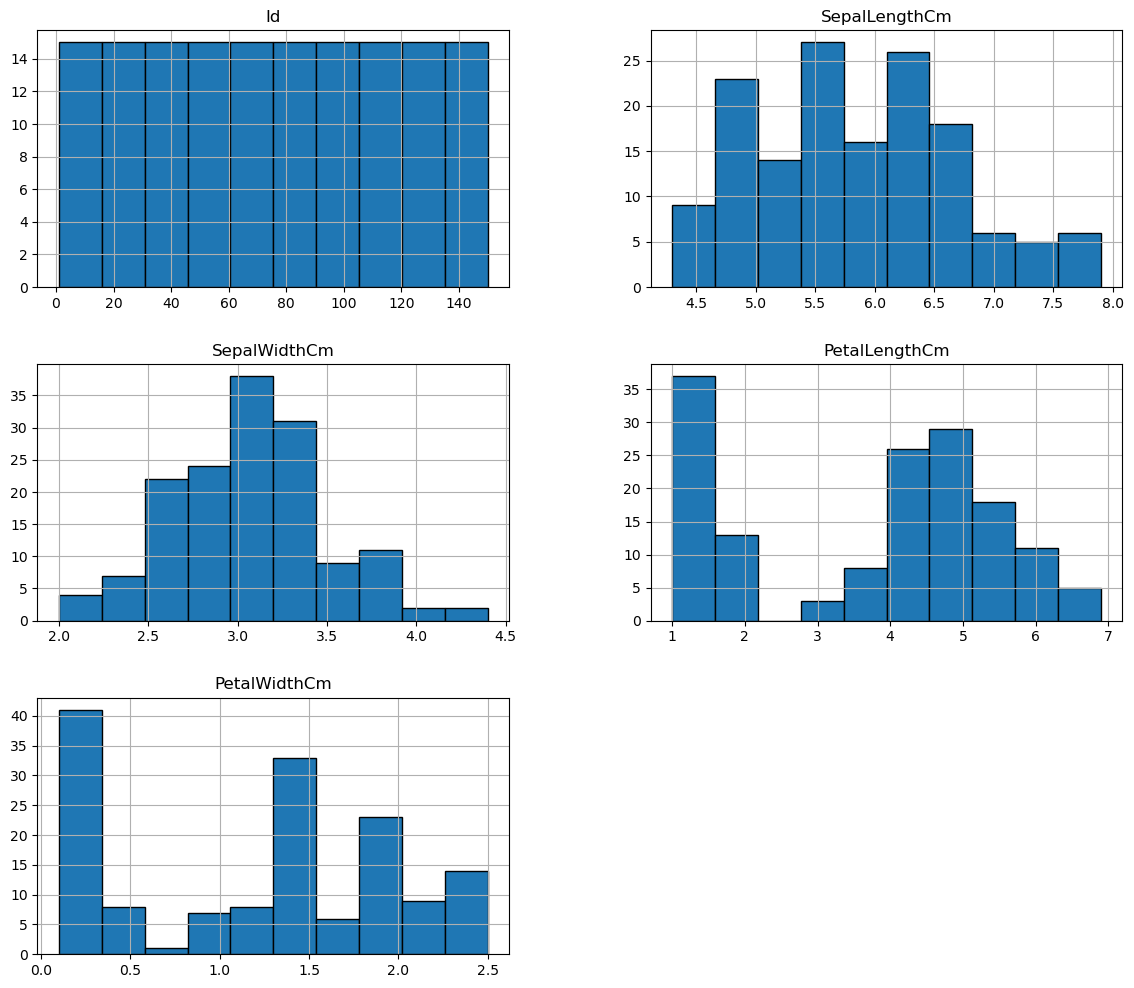

In [23]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.
df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

## <span style= 'color: red'>13. Change the edgecolor to 'red'.  Copy and past the code above into a new code block and use code.</span>

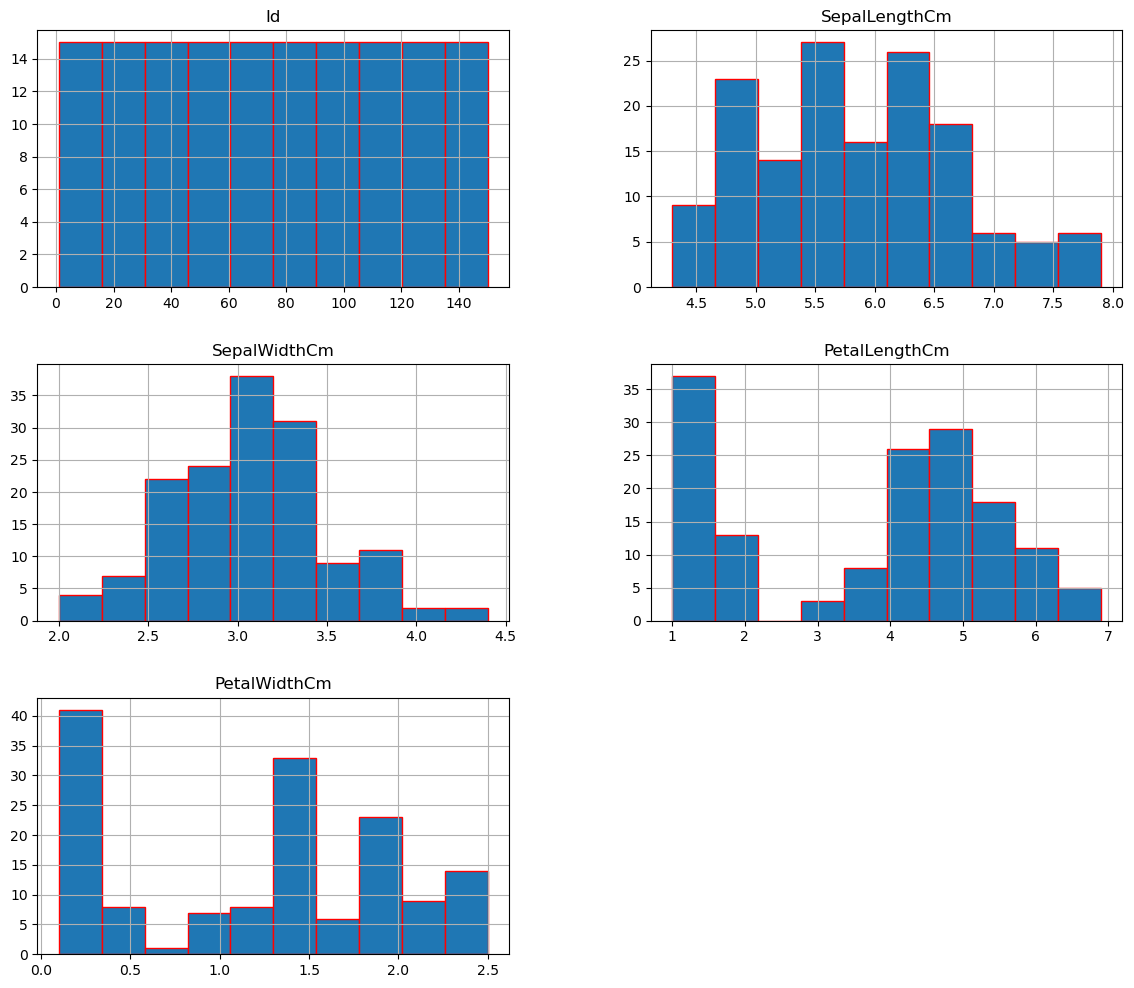

In [24]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.
df.hist(edgecolor= 'red',figsize=(14,12))
plt.show()

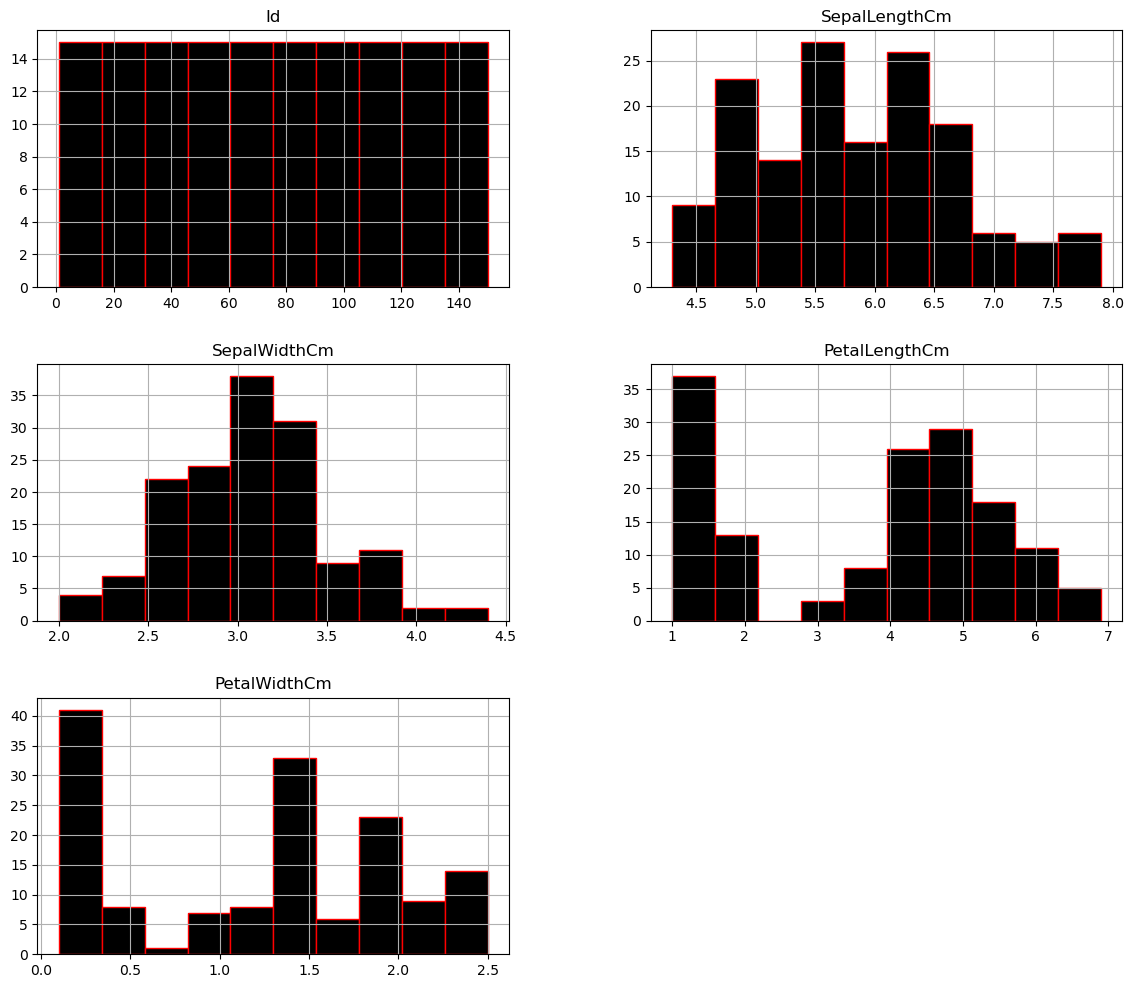

In [25]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.
df.hist(edgecolor= 'red',figsize=(14,12), color = "black")
plt.show()

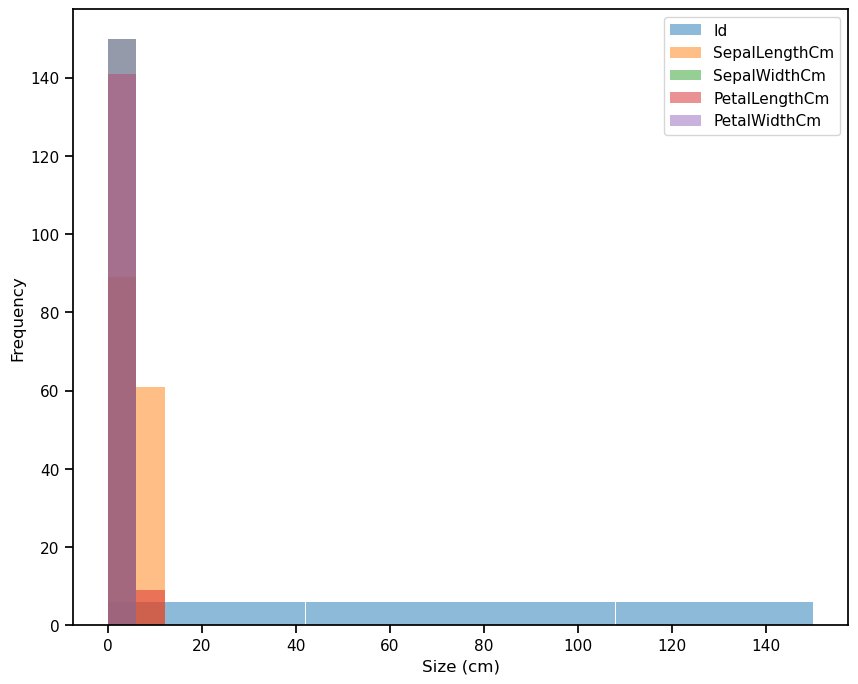

In [26]:
# Here the variables are superimposed on each other
import seaborn as sns
sns.set_context('notebook')


ax = df.plot.hist(bins=25, alpha=0.5, figsize= (10,8))
ax.set_xlabel('Size (cm)');

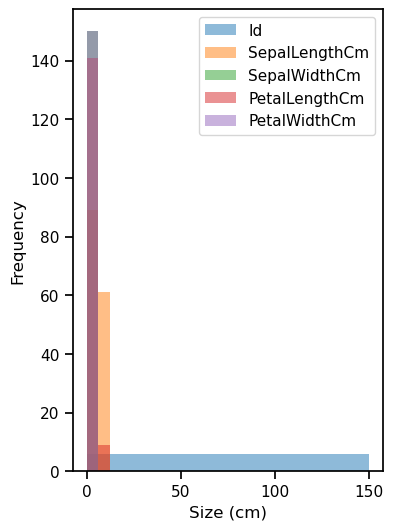

In [27]:
# Here the variables are superimposed on each other
import seaborn as sns
sns.set_context('notebook')


ax = df.plot.hist(bins=25, alpha=0.5, figsize= (4,6))
ax.set_xlabel('Size (cm)');

### Creating  Box Plots

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

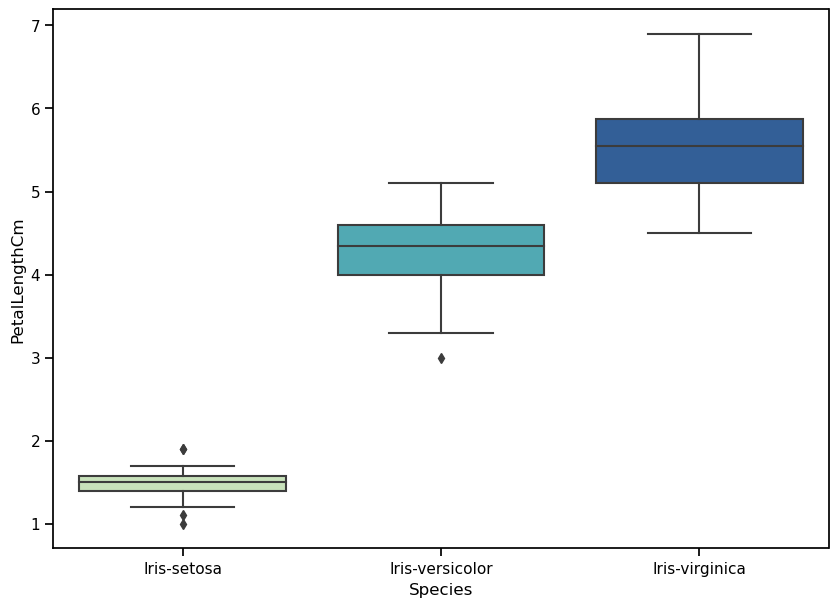

In [28]:
# Boxplots with color added and broken into each PetalLengthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='PetalLengthCm',data=df ,palette='YlGnBu')

## <span style= 'color: red'>14. Look up what other colors can be used for palette in Seaborn and enter a new color.  Copy and paste the code above into a new code block and enter a new color into the color.  Don't forget to run your new code.</span>

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

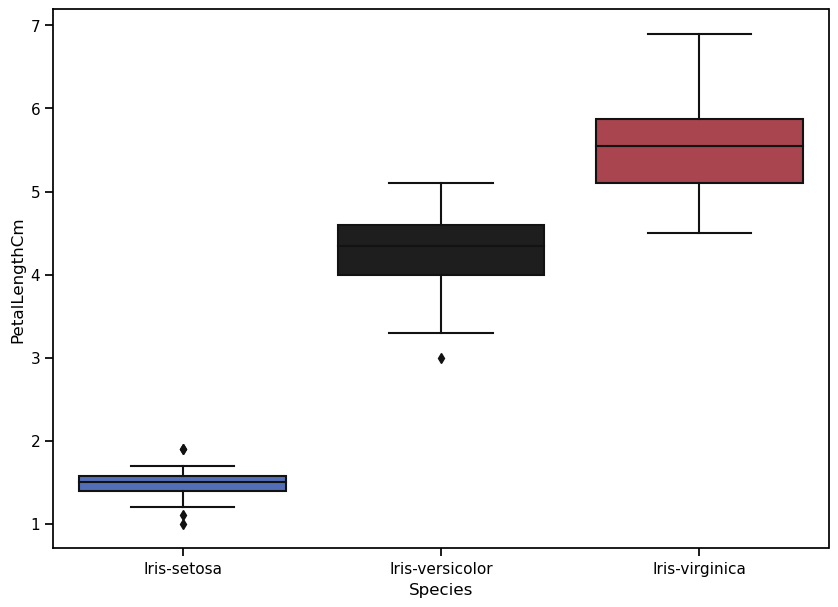

In [30]:
# Boxplots with color added and broken into each PetalLengthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='PetalLengthCm',data=df ,palette='icefire')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

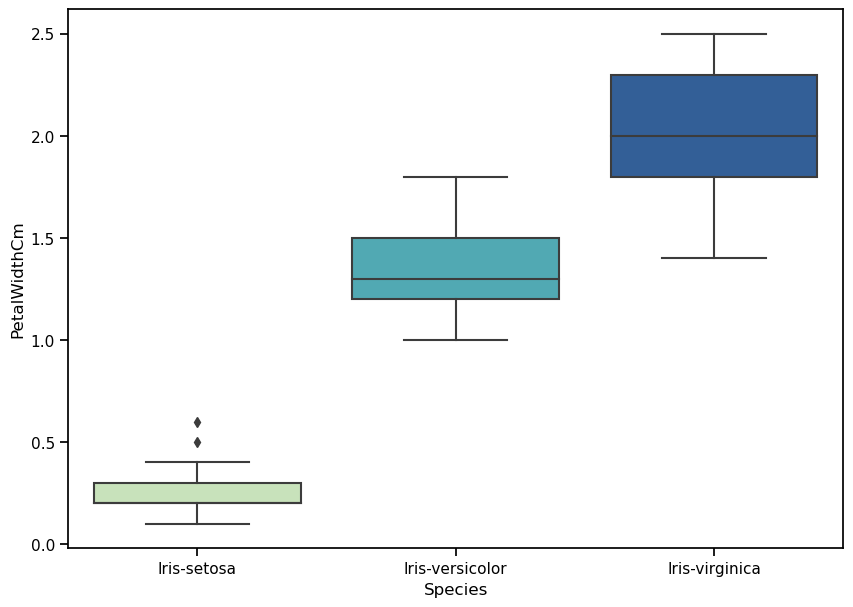

In [31]:
# Boxplots with color added and broken into each PetalWidthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='PetalWidthCm',data=df ,palette='YlGnBu')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

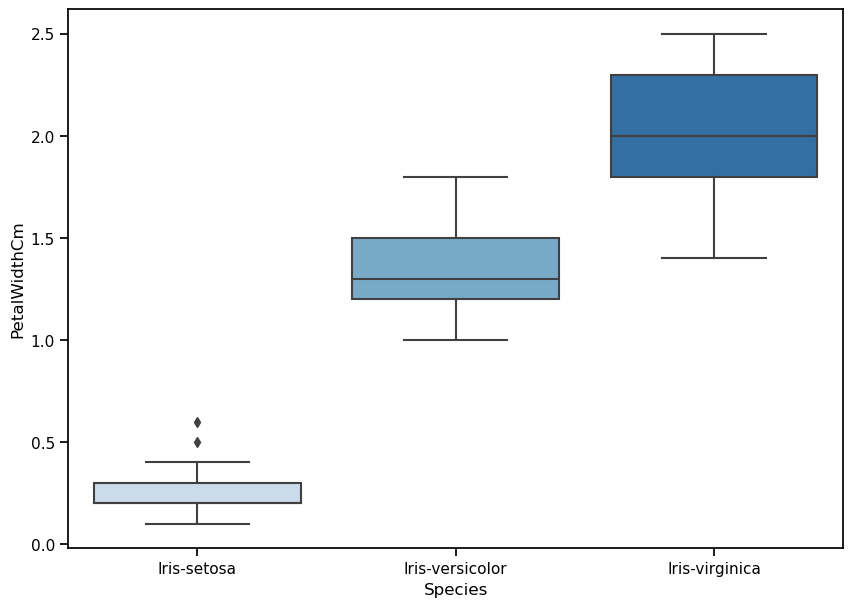

In [32]:
# Boxplots with color added and broken into each PetalWidthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='PetalWidthCm',data=df ,palette='Blues')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

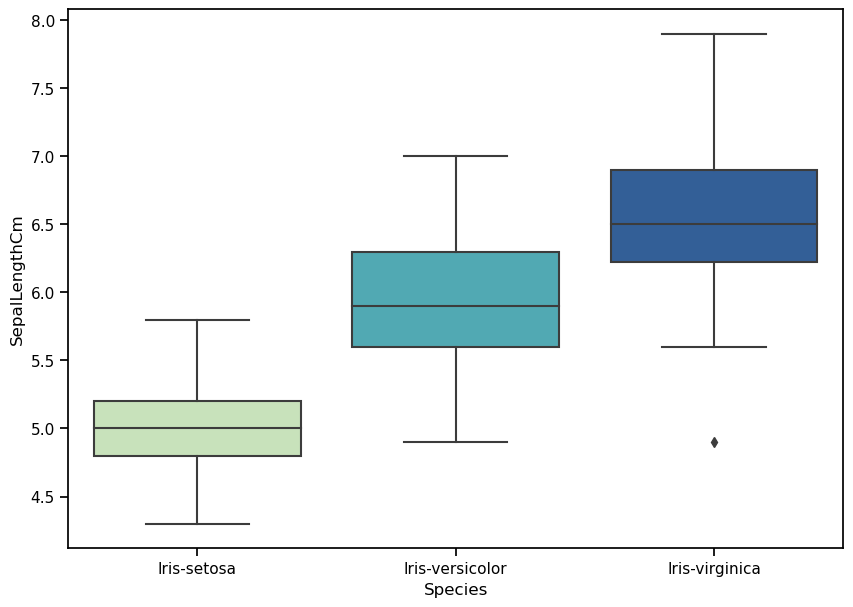

In [33]:
# Boxplots with color added and broken into each SepalLengthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='SepalLengthCm',data=df ,palette='YlGnBu')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

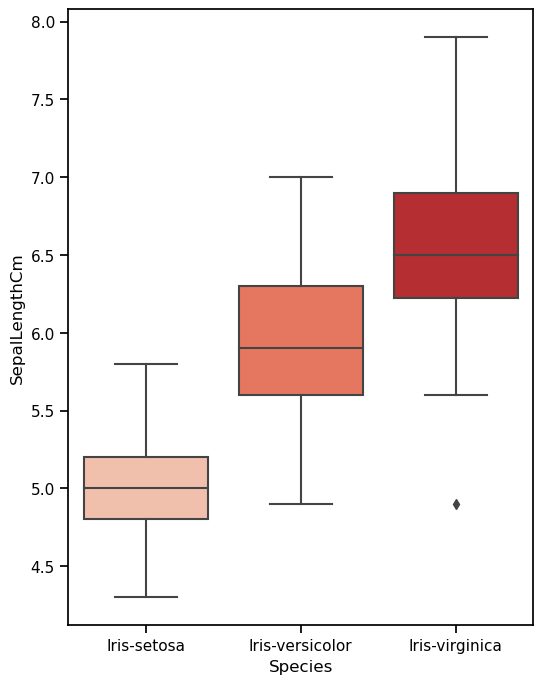

In [34]:
# Boxplots with color added and broken into each SepalLengthCm/Species
plt.figure(figsize=(6,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df ,palette='Reds')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

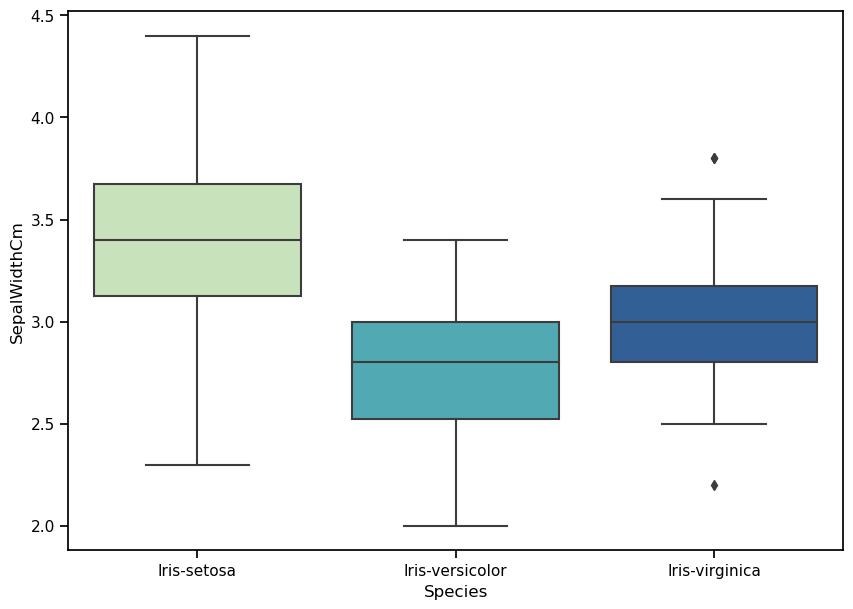

In [35]:
# Boxplots with color added and broken into each SepalWidthCm/Species
plt.figure(figsize=(10,7))
sns.boxplot(x='Species',y='SepalWidthCm',data=df ,palette='YlGnBu')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

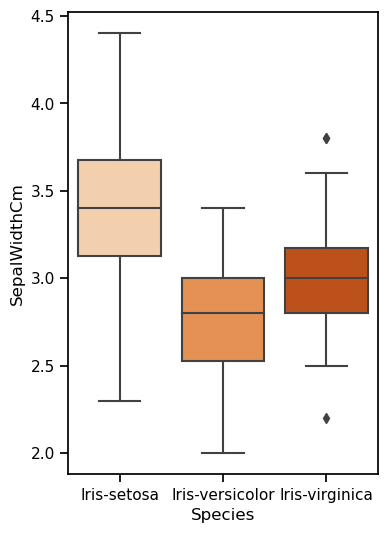

In [36]:
# Boxplots with color added and broken into each SepalWidthCm/Species
plt.figure(figsize=(4,6))
sns.boxplot(x='Species',y='SepalWidthCm',data=df ,palette='Oranges')

### Creating a Violin Plot  

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

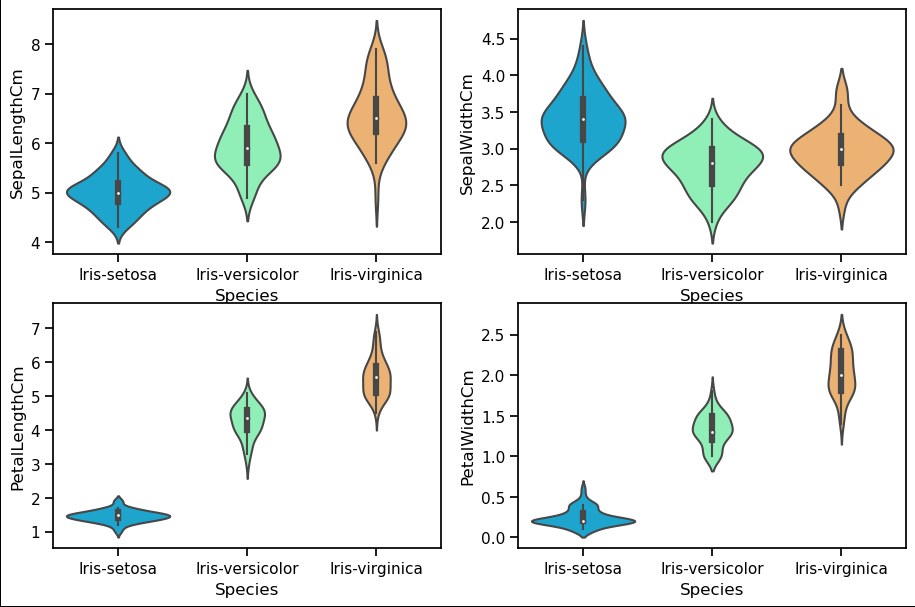

In [37]:
# Plot all violin plots together
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(11,7));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df, palette='rainbow')
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df, palette='rainbow')
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df, palette='rainbow')
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df, palette='rainbow')

## <span style= 'color: red'>15. Use the research you did earlier on the different palettes in Seaborn and change at least one of the variable's palette, using the code above.  Copy and Paste the code above into a newly created code block, make the change, and run the code.</span>

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

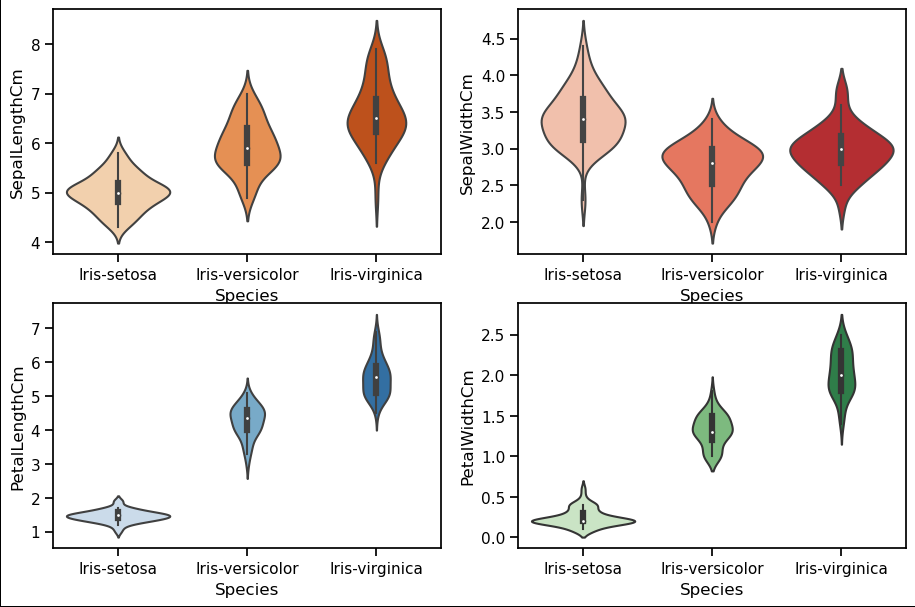

In [39]:
# Plot all violin plots together
plt.figure(edgecolor="black", linewidth= 1.2,figsize=(11,7));
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df, palette='Oranges')
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df, palette='Reds')
plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df, palette='Blues')
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df, palette='Greens')

### Create a Pair Plot 

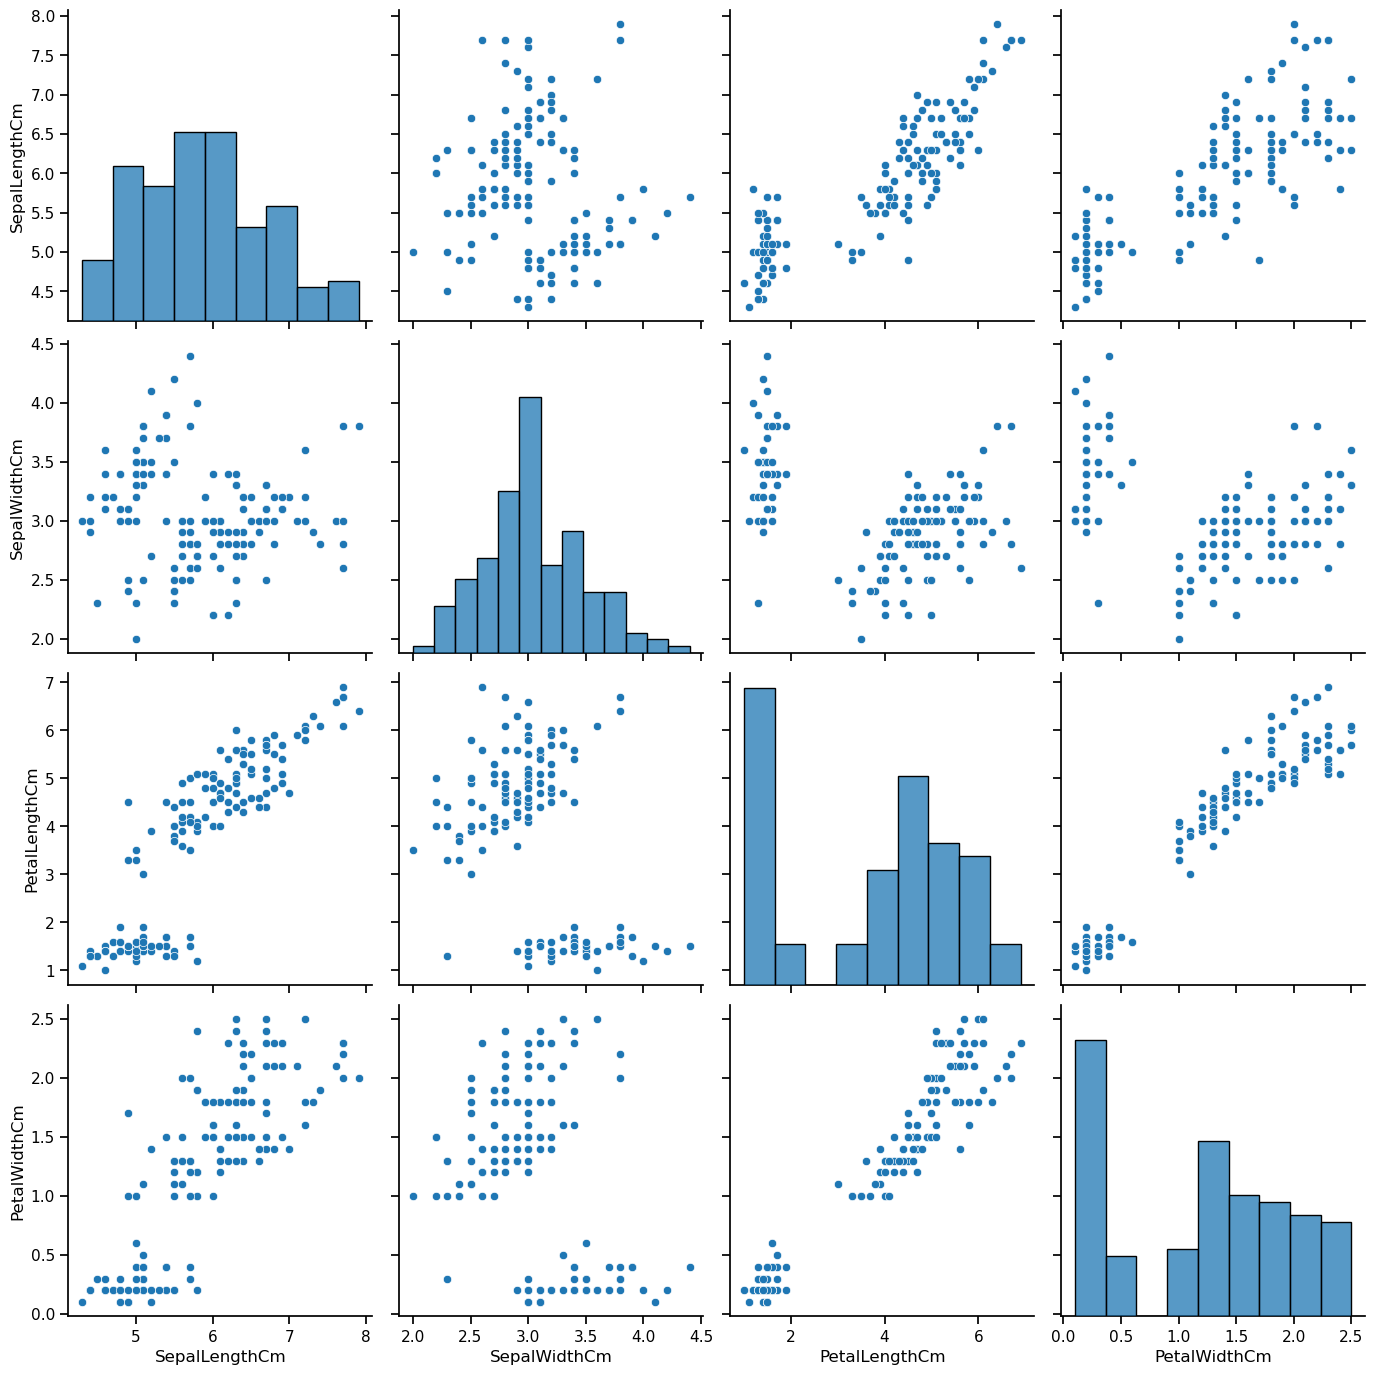

In [25]:
sns.pairplot(df, height=3.5);
plt.show()

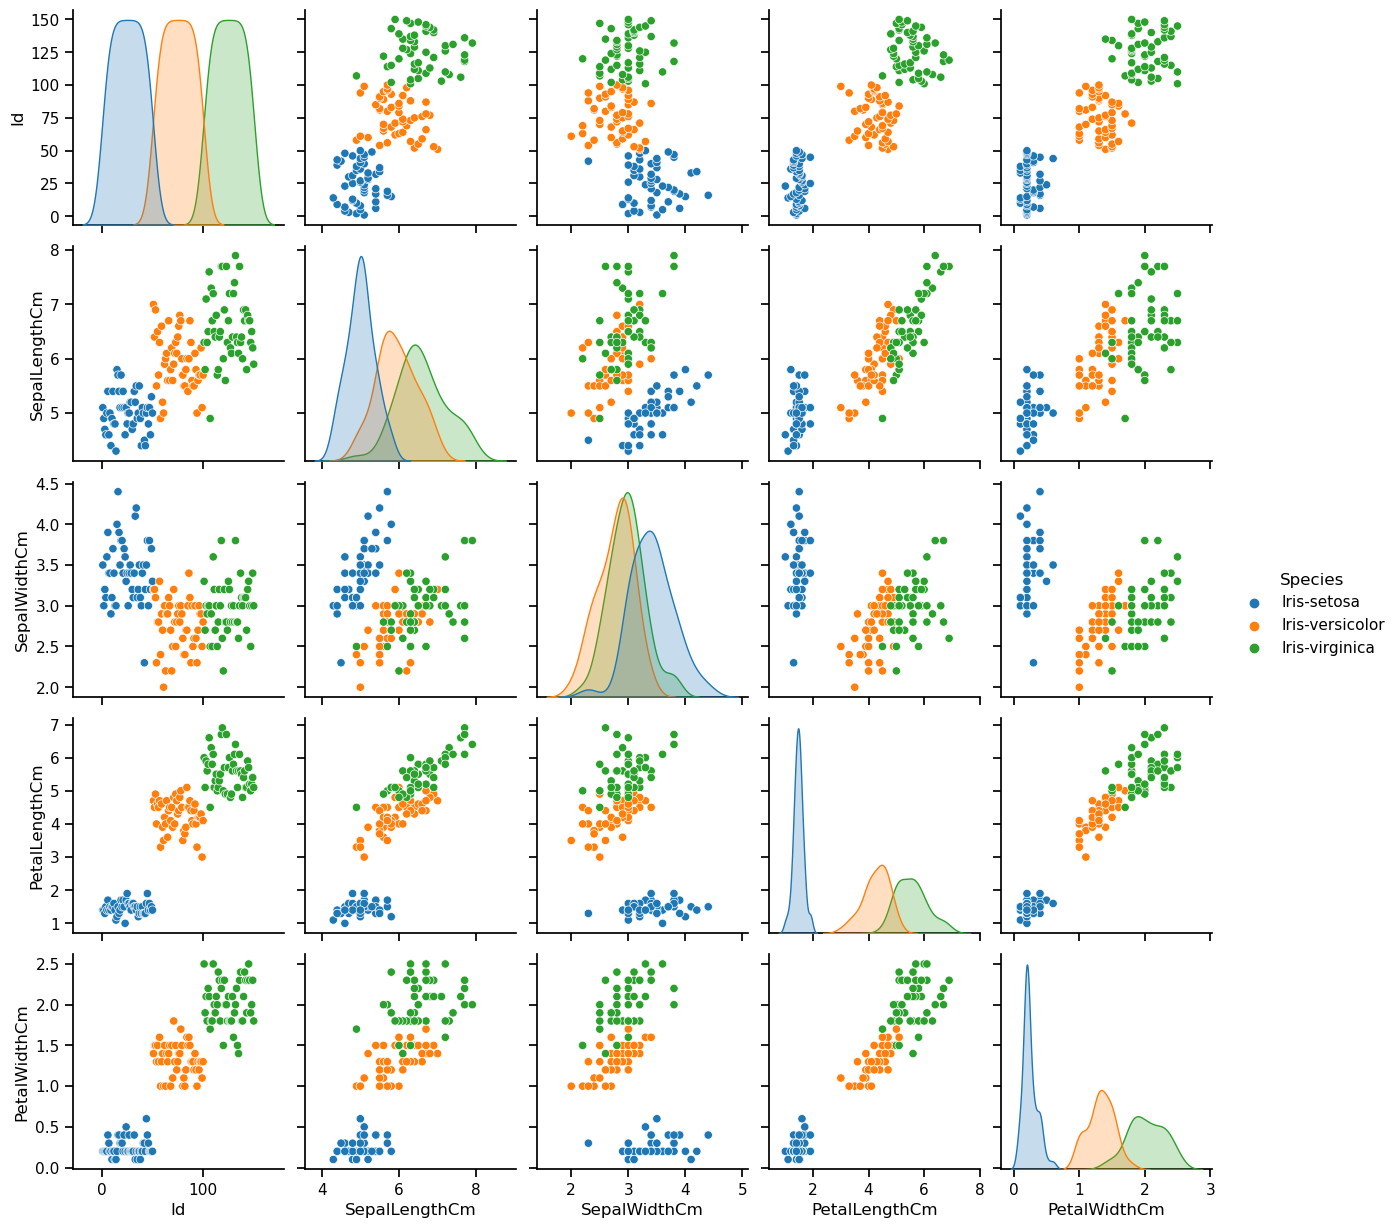

In [44]:
sns.pairplot(df, height=2.5, hue="Species");
plt.show()

### Creating a Pair Plot with Color

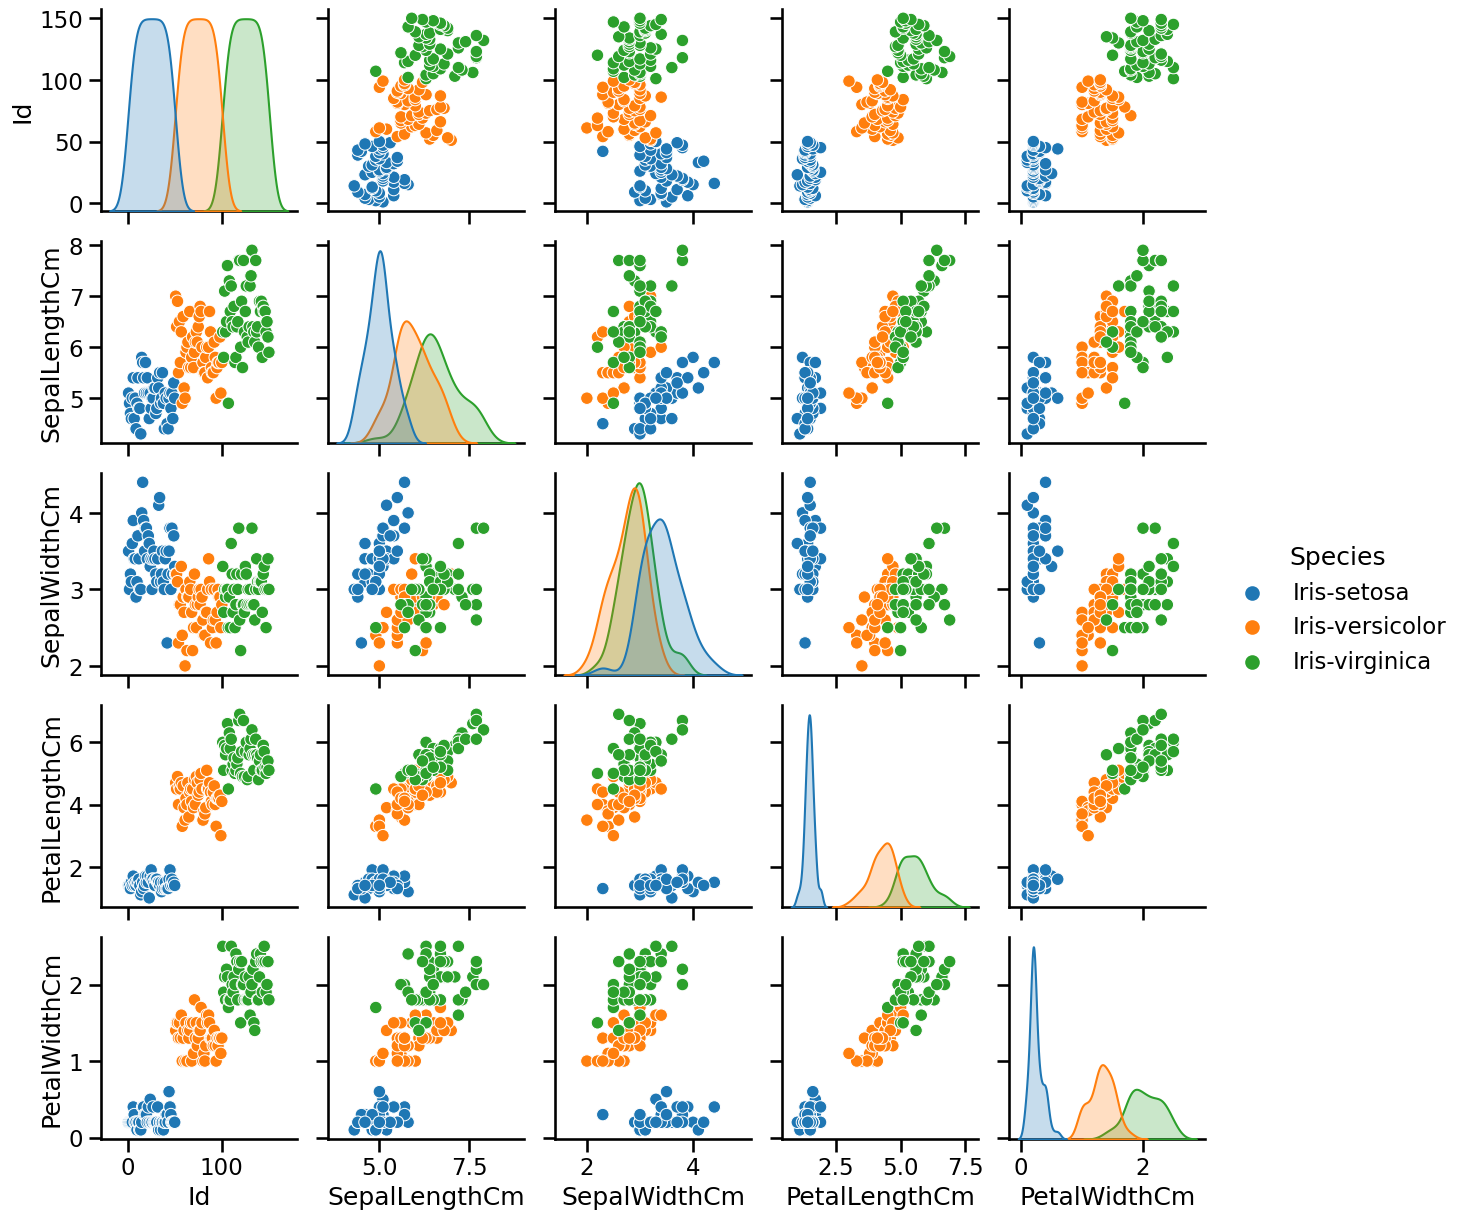

In [45]:
# Let's try that again using color.  Notice: assigning a hue variable adds a color to the graphs as well as a few other changes.

sns.set_context('talk')
sns.pairplot(df, hue='Species');

### Split the dataset into X (independent) and Y variables (dependent).

In [46]:
# store dataframe values into a numpy array
array= df.values
# separate array into input and output by slicing
# for X(input) [:, 0:4] --> all the rows, columns from 0 - 3 (does not include last column) 
# these are the independent variables or predictors

X= array[:,0:4]
# for Y(input) [:, 4] --> all the rows, column 4
# this is the value we are trying to predict
# we won't use this going forward, since this is an unsupervised model and we don't know the outcome. 
# we can actually hashtag this out since the dependent variable isn't used in this model.
# Y= array[:,4]

## <span style= 'color: red'>16. What is the algorithm we will use for this homework assignment?  Enter your answer by adding a new code block and use markdown.</span>

K-Means

## <span style= 'color: red'>17. What are centroids?  Enter your answer by adding a new code block and use markdown.</span>

The center of cluster of data points.

## <span style= 'color: red'>18. When is it best to use an odd number for K?  Enter your answer by adding a new code block and use markdown.</span>

While it is recommended to use an odd number for K to reduce the likelihood of a tie, it depends on the data given. 

In [48]:
# Build the model
# set cluster (K) to 3 to start
KMeans(n_clusters=8, init='k-means++', n_init='10', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

km= KMeans(n_clusters=3, random_state=21)
# defaults
# KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)


# Use the model to cluster the input data
km.fit(X)
centroids= km.cluster_centers_
print(centroids)

# These are vector values -each centroid has a vector of values -3 centroids 3 vectors of values -position values

[[ 75.5     5.936   2.77    4.26 ]
 [125.5     6.588   2.974   5.552]
 [ 25.5     5.006   3.418   1.464]]


In [49]:
# Build the model
# set cluster (K) to 3 to start
KMeans(n_clusters=8, init='k-means++', n_init='10', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

km= KMeans(n_clusters=5, random_state=21)
# defaults
# KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',random_state=None, tol=0.0001, verbose=0)


# Use the model to cluster the input data
km.fit(X)
centroids= km.cluster_centers_
print(centroids)

# These are vector values -each centroid has a vector of values -3 centroids 3 vectors of values -position values

[[ 75.5          5.98         2.75         4.3       ]
 [ 15.5          5.02666667   3.45         1.47333333]
 [135.5          6.60666667   3.01         5.48333333]
 [ 45.5          5.35         3.20333333   2.42333333]
 [105.5          6.25333333   2.85666667   5.11333333]]


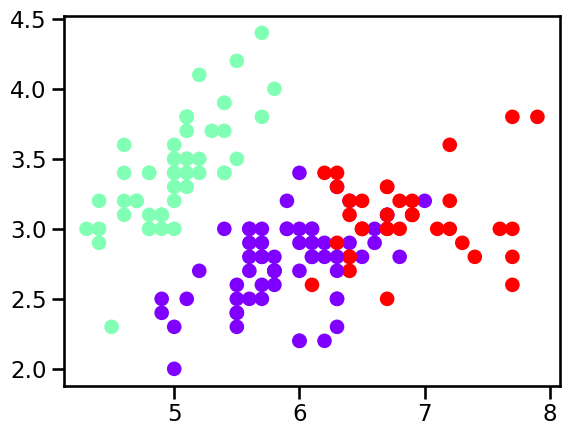

In [29]:
#  Plot all the data points without the centroids
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='rainbow')
plt.show( )

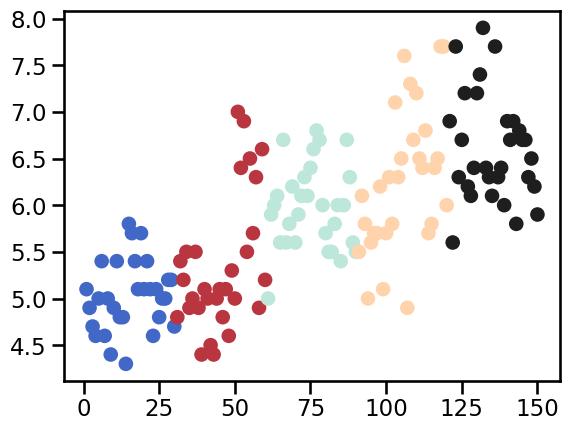

In [50]:
#  Plot all the data points without the centroids
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='icefire')
plt.show( )

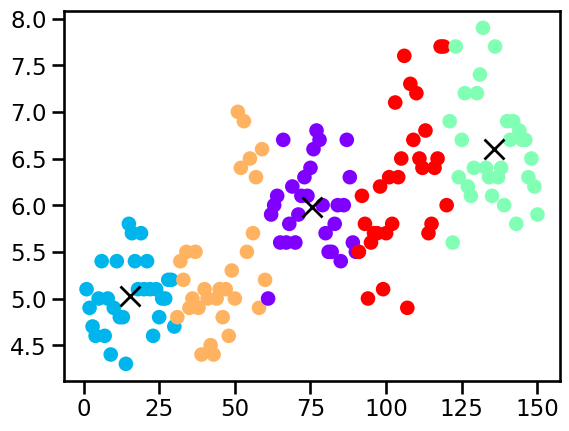

In [51]:
# Plot all the data points with centroids
# plot the data points with centroids
# plot using first and second variables of the vector
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='rainbow')

lines= plt.plot(centroids[0,0],centroids[0,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

lines= plt.plot(centroids[1,0],centroids[1,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

lines= plt.plot(centroids[2,0],centroids[2,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

plt.show()

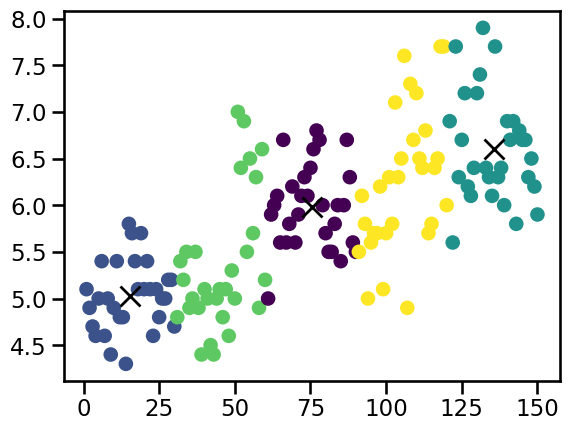

In [52]:
# Plot all the data points with centroids
# plot the data points with centroids
# plot using first and second variables of the vector
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='viridis')

lines= plt.plot(centroids[0,0],centroids[0,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

lines= plt.plot(centroids[1,0],centroids[1,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

lines= plt.plot(centroids[2,0],centroids[2,1], 'kx', color='black')
plt.setp(lines, ms=15.0)
plt.setp(lines, mew=2.0)

plt.show()

In the above illustration, which centroid represents which vector?  

We're using the the first and second variables of the vector -plt.scatter(X[:, 0], X[:, 1]

### Creating labels for the clusters

Text(0.5, 1.0, 'Predicted')

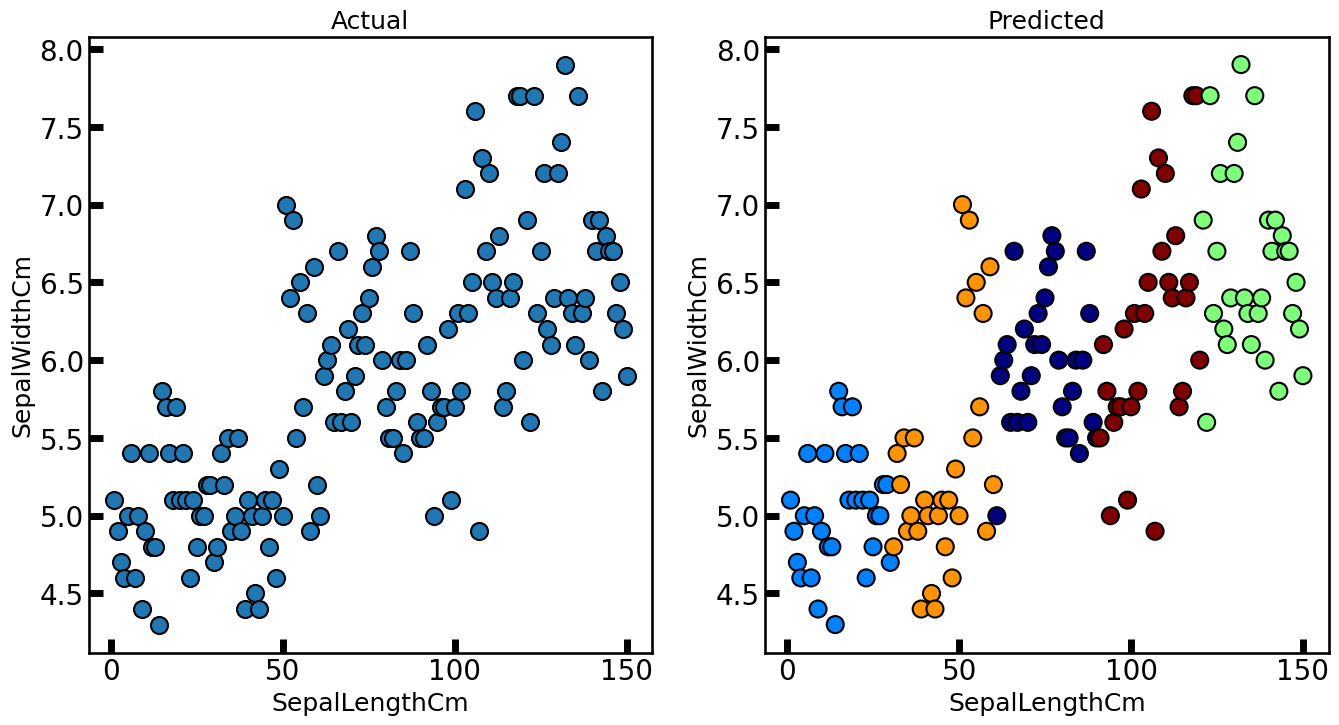

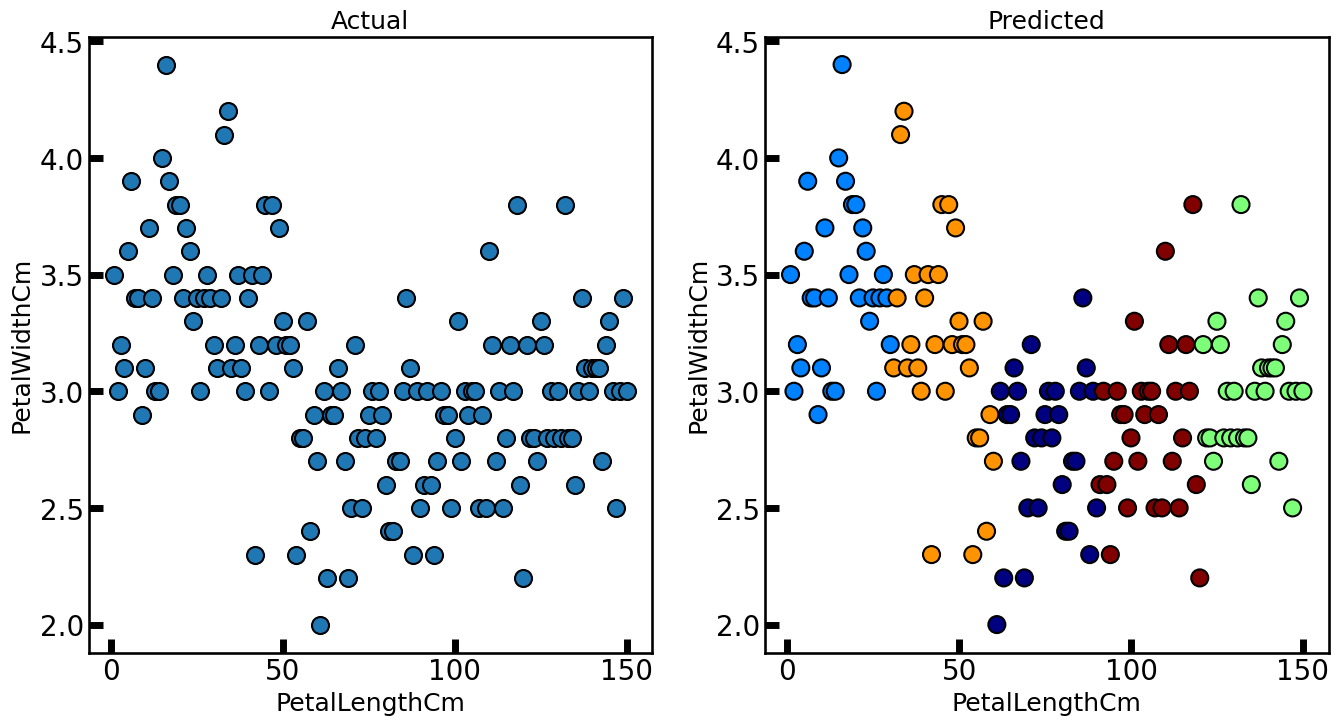

In [53]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('SepalLengthCm', fontsize=18)
axes[0].set_ylabel('SepalWidthCm', fontsize=18)
axes[1].set_xlabel('SepalLengthCm', fontsize=18)
axes[1].set_ylabel('SepalWidthCm', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 2], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 2], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('PetalLengthCm', fontsize=18)
axes[0].set_ylabel('PetalWidthCm', fontsize=18)
axes[1].set_xlabel('PetalLengthCm', fontsize=18)
axes[1].set_ylabel('PetalWidthCm', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [54]:
# print 10 labels
cluster_labels= km.labels_[::10]
print(cluster_labels)

[1 1 1 3 3 3 0 0 0 4 4 4 2 2 2]


## <span style= 'color: red'>19. What are the 3 clusters (not the flower species)?  Enter your answer by adding a new code block and use markdown.</span>

The cluster are 0, 1, 2 due to the lack of data present and being supervised, but treating it as unsupervised.

## Classify/Prediction

Let's use the model to predict/classify the flower type of a new record i.e. either Iris Setosa, or Iris Versicolor, or Iris Virginica.  

The new record has the following predictors:
- SepalLengthCm= 5.3
- SepalWidthCm = 3.0
- PetalLengthCm= 4.5
- PetalWidthCm= 1.5

You can enter the 2nd Prediction

In [55]:
# 1st prediction
#  Notice only the cluster number is given.  
kmeans= km.predict([[5.3, 3.0, 4.5, 1.5]])
print("The new flower is assigned to cluster ", kmeans)

The new flower is assigned to cluster  [1]


In [56]:
#2nd prediction
# Notice only the cluster number is given.
kmeans2 = km.predict([[5, 3.6, 1.4, 1.5]])
print("The new flower is assigned to cluster ", kmeans2)

The new flower is assigned to cluster  [1]


## <span style= 'color: red'>20. Why do we say the flower falls into Cluster 0, 1, or 2 and not the flower species name?  Enter your answer by adding a new code block and use markdown.</span>

Since we do not have all the data or answer present - the given is supervised but being treated as unsupervised - to determine the clusters.

## <span style= 'color: red'>21. This question is for you to enter any question or comments about the assignment.  Enter your answer by adding a new code block and use markdown.</span>